In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#### About Data

We are going to use the USA_Housing dataset. Since house price is a continues variable, this is a regression problem. The data contains the following columns:

* **'Avg. Area Income'**: Avg. Income of residents of the city house is located in.
* **'Avg. Area House Age'**: Avg Age of Houses in same city
* **'Avg. Area Number of Rooms'**: Avg Number of Rooms for Houses in same city
* **'Avg. Area Number of Bedrooms'**: Avg Number of Bedrooms for Houses in same city
* **'Area Population'**: Population of city hou se is located in
* **'Price'**: Price that the house sold at
* **'Address'**: Address for the house

In [15]:
df = pd.read_csv('C:/Users/shreyash/Desktop/House_Price_prediction/new_housing_data/USA_Housing.csv')
df.head()



,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [16]:
# figuring out state
#df['State'] = df['Address'].apply(lambda x: x.split(' ')[-2]) old
df['State'] = df['Address'].apply(lambda x: x.split(' ')[-2] if isinstance(x, str) else np.nan)


## Basic EDA

In [17]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
 7   State                         5000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 312.6+ KB


In [19]:
df.State.value_counts().sort_values(ascending=False)[0:10]

State
AA    177
AP    170
AE    167
OR     91
GU     91
KY     89
NC     89
DE     89
VT     86
AZ     86
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


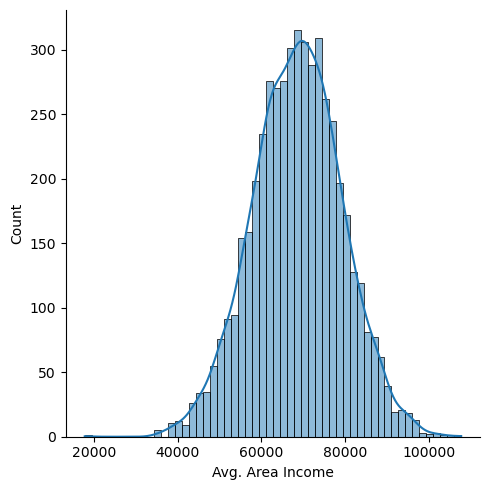

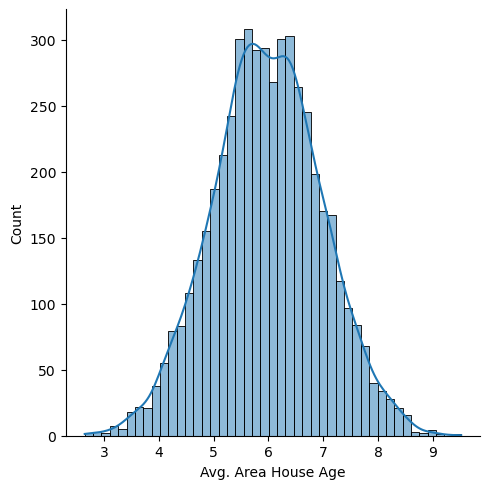

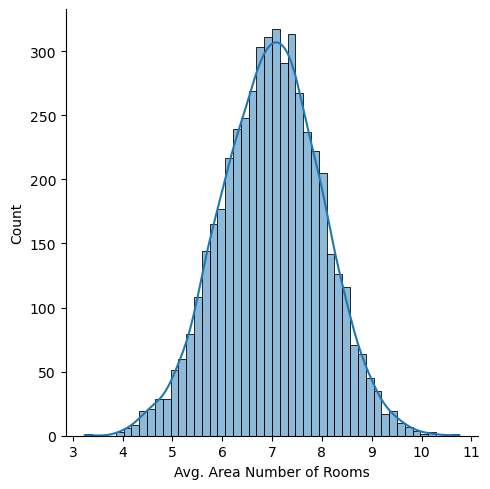

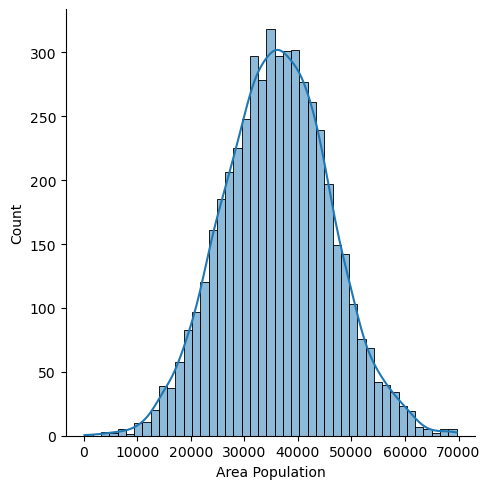

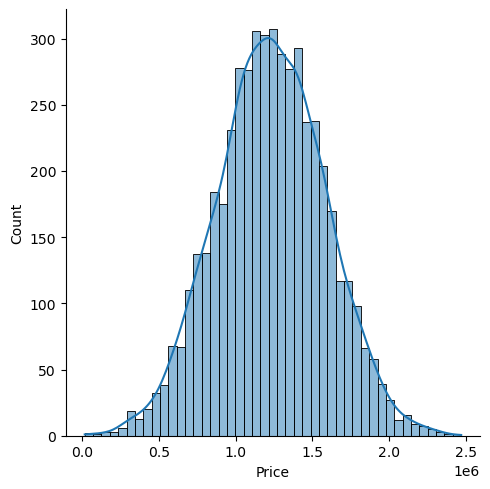

In [20]:
countnious_col = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Price']

for i in countnious_col:
    sns.displot(df[i], kde=True)


#### All of them are normally distributed

In [21]:
ranges = [0, 500000, 1000000, 1500000, 2000000, np.inf]
label = ['0-500k', '500k-1000k', '1000k-1500k', '1500k-2000k', '2000k+']

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df.dropna(subset=['Price'], inplace=True)

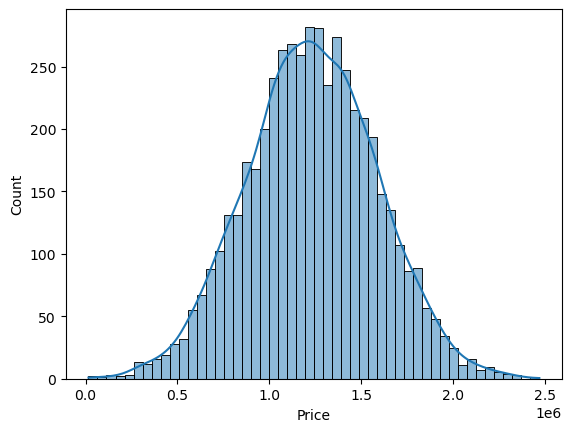

In [22]:
sns.histplot(df['Price'], bins=50, kde=True)
plt.show()

#### Most of the houses in this dataset lie between 1000k-1500k

In [23]:
#sns.heatmap(df.corr(), annot=True)
#plt.show()

## Q. Does Area income affect price of house?

In [24]:
ranges = [0, 20000, 40000, 60000, 80000, np.inf]
label = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000+']

pd.cut(df['Avg. Area Income'], bins=ranges, labels=label).head()

0    60000-80000
1    60000-80000
2    60000-80000
3    60000-80000
4    40000-60000
Name: Avg. Area Income, dtype: category
Categories (5, object): ['0-20000' < '20000-40000' < '40000-60000' < '60000-80000' < '80000+']

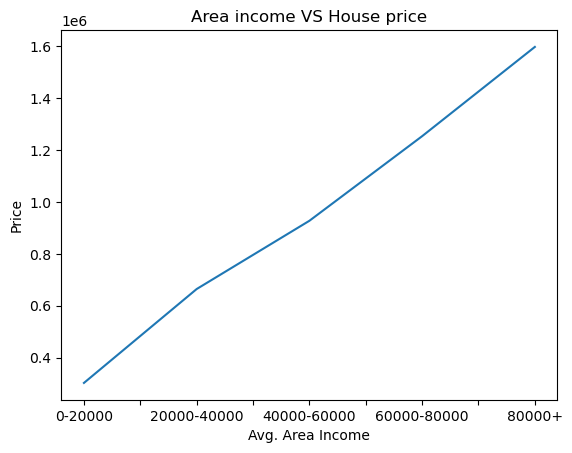

In [25]:
df.groupby(pd.cut(df['Avg. Area Income'], bins=ranges, labels=label))['Price'].mean().plot()
plt.title('Area income VS House price')
plt.ylabel('Price')
plt.show()

#### Ans: Yes, it does affect as we can see a linear relationship between Area income and Price of house

## Q. Does age of house have any affect on it's price?

In [26]:
df['Avg. Area House Age'].describe()

count    5000.000000
mean        5.977222
std         0.991456
min         2.644304
25%         5.322283
50%         5.970429
75%         6.650808
max         9.519088
Name: Avg. Area House Age, dtype: float64

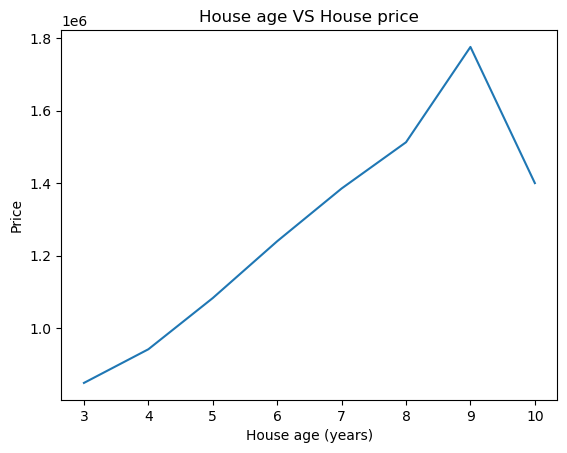

In [27]:
#df.groupby(round(df['Avg. Area House Age']))['Price'].mean().plot() old
df['Avg. Area House Age'] = pd.to_numeric(df['Avg. Area House Age'], errors='coerce')
df.groupby(round(df['Avg. Area House Age']))['Price'].mean().plot()
plt.title('House age VS House price')
plt.xlabel('House age (years)')
plt.ylabel('Price')
plt.show()

#### Ans: Yes it does affect as there is a linear relationship between House age and it's price. But price increase until it's less than 10 years, after that the price decrease drastically and most probably it will continue to decrease. This makes sence as people wants new house as it have less maintenance. 

## Q. Does number of rooms and bedrooms have any effect on prices?

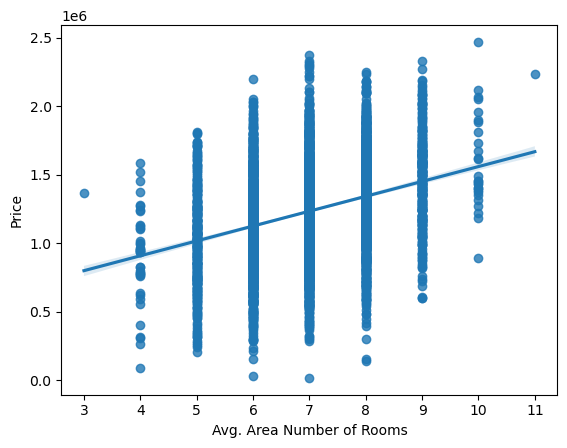

In [28]:
#sns.regplot(round(df['Avg. Area Number of Rooms']), round(df['Price'])) old
sns.regplot(x=round(df['Avg. Area Number of Rooms']), y=round(df['Price']))
plt.show()


In [29]:
display(df.groupby(round(df['Avg. Area Number of Rooms']))['Price'].mean())

Avg. Area Number of Rooms
3.0     1.365081e+06
4.0     9.020765e+05
5.0     1.020620e+06
6.0     1.124506e+06
7.0     1.234440e+06
8.0     1.334549e+06
9.0     1.464372e+06
10.0    1.591249e+06
11.0    2.235295e+06
Name: Price, dtype: float64

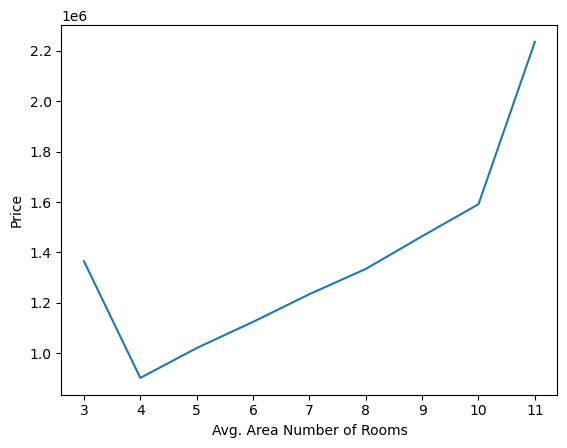

In [30]:
df.groupby(round(df['Avg. Area Number of Rooms']))['Price'].mean().plot()
plt.ylabel('Price')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


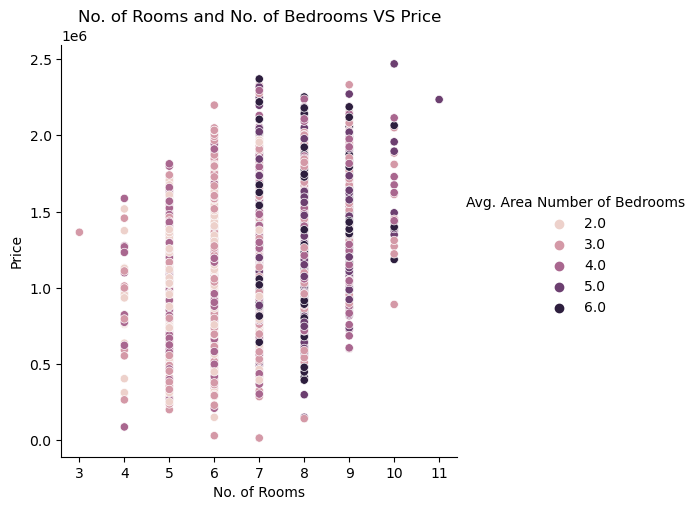

In [31]:
sns.relplot(
    x=round(df['Avg. Area Number of Rooms']),
    y=round(df['Price']),
    hue=round(df['Avg. Area Number of Bedrooms'])
)
plt.title('No. of Rooms and No. of Bedrooms VS Price')
plt.xlabel('No. of Rooms')
plt.ylabel('Price')
plt.show()


#### Ans: Price will increase gradually with number of Rooms and Bedrooms 

## Q. Does City affect prices of houses?

In [32]:
df.groupby('State')['Price'].mean().sort_values(ascending=False)[0:10]

State
AK    1.337328e+06
TX    1.336076e+06
UT    1.308736e+06
CO    1.299452e+06
SD    1.272387e+06
AZ    1.271942e+06
CT    1.270711e+06
VA    1.269337e+06
MI    1.267164e+06
MS    1.265153e+06
Name: Price, dtype: float64

<Axes: xlabel='State'>

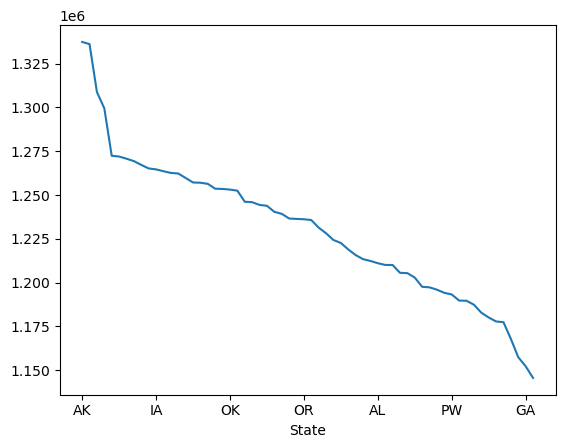

In [33]:
df.groupby('State')['Price'].mean().sort_values(ascending=False).plot()

#### Ans: Yes, state does affect price of house

## Q. Does population of area affect price of house?

<Axes: xlabel='Area Population', ylabel='Price'>

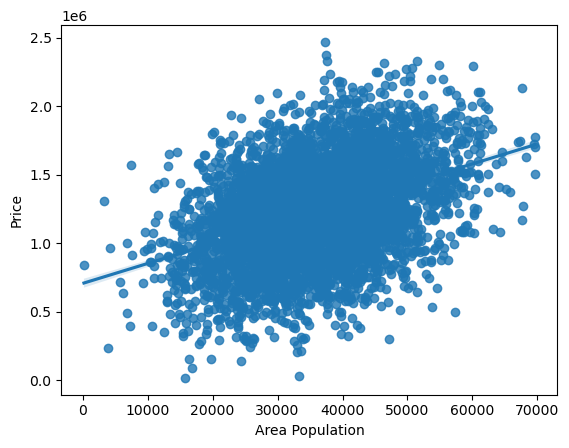

In [34]:
sns.regplot(x='Area Population', y='Price', data=df)

In [35]:
ranges = [0, 10000, 20000, 30000, 40000, 50000, 60000, np.inf]
label = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k+']

df['Population group'] = pd.cut(df['Area Population'], bins=ranges, labels=label)

C:\Users\shreyash\AppData\Local\Temp\ipykernel_12700\1417919946.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='Population group', y='Price', kind='point', ci=None, data=df)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


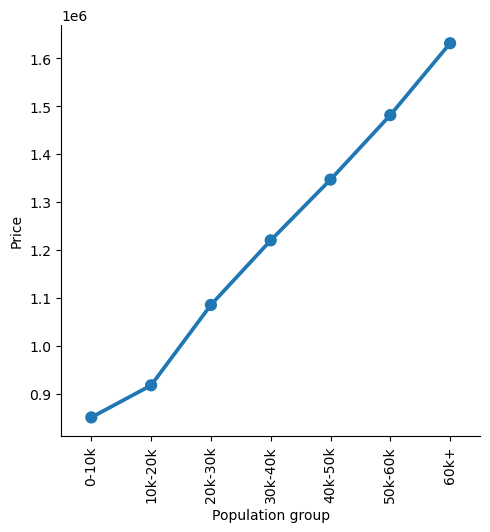

In [36]:
sns.catplot(x='Population group', y='Price', kind='point', ci=None, data=df)
plt.xticks(rotation=90)
plt.show()

#### Ans: Populated states clearly have expensive houses

## Q. Which factors affect the price of house the most?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


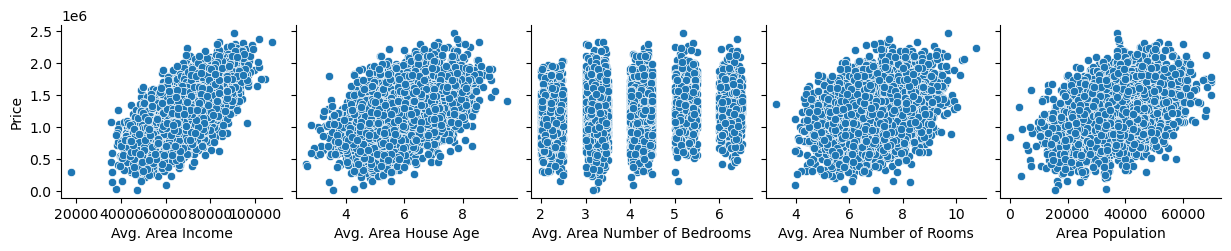

In [37]:
x_col = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Bedrooms', 'Avg. Area Number of Rooms', 'Area Population']
y_col = ['Price']

sns.pairplot(df, 
            x_vars= x_col,
            y_vars= y_col)
plt.show()

In [38]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
##for col in df.columns:
    # Compare if the dtype is object
    #if df[col].dtypes=='object':
for col in df.columns:
    if df[col].dtypes == 'object' and col != 'Address':
        df[col] = le.fit_transform(df[col])

    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

print("Available columns:", df.columns)

# Update the drop list to exclude non-existent columns
columns_to_drop = [col for col in ['Price', 'Price group', 'Population group', 'Address'] if col in df.columns]
X = df.drop(columns_to_drop, axis=1)

# Ensure target column exists
if 'Price' in df.columns:
    y = df['Price']
else:
    raise KeyError("Target column 'Price' is missing from the dataframe.")

# Define pipeline
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

Available columns: Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'State', 'Population group'],
      dtype='object')


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [42]:
print("Train score:")
print(lin_reg.score(X_train, y_train))

print("Test score:")
print(lin_reg.score(X_test, y_test))

Train score:
0.9192986579571021
Test score:
0.9146818408057482


In [43]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
Avg. Area Income,232679.729575
Avg. Area House Age,163840.999409
Area Population,151252.336165
Avg. Area Number of Rooms,121110.590639
Avg. Area Number of Bedrooms,2892.813628
State,2.513886


In [44]:
# Choosing best features
# X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
# X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
# y = df['Price']


# pipeline = Pipeline([
#     ('std_scalar', StandardScaler())
# ])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# X_train = pipeline.fit_transform(X_train)
# X_test = pipeline.transform(X_test)

# lin_reg = LinearRegression(normalize=True)
# lin_reg.fit(X_train,y_train)

# print("Train score:")
# print(lin_reg.score(X_train, y_train))

# print("Test score:")
# print(lin_reg.score(X_test, y_test))
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Feature selection
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
y = df['Price']

# Pipeline for scaling
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Scale the data
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# Initialize and fit Linear Regression
lin_reg = LinearRegression()  # Removed 'normalize' parameter
lin_reg.fit(X_train, y_train)

# Print train and test scores
print("Train score:")
print(lin_reg.score(X_train, y_train))

print("Test score:")
print(lin_reg.score(X_test, y_test))


Train score:
0.9199052670736053
Test score:
0.9132253586958637


#### Ans: The model suggests that area income, house age and area population afftects "Price" of houses the most,while the number of rooms and bedrooms affects "Price" of house the least. 

## Conclusion

* According to the dataset, residential home prices across the United States were most affected by the area of income, the house age and the population of that area and this will continue in future.

* Factors like city, number of rooms and bedrooms will also be a  affecting factor for the price in residential houses.

* And other factors which are not in this dataset like economy, intrest rate will also be important.

In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'models/house_price_model.joblib')

# Save the scaler (if you're using one for feature scaling)
joblib.dump(scaler, 'models/scaler.joblib')

print("Model and Scaler saved successfully!")
